# Bank Loan Term Prediction
---

## Import packages & read data.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
#import imblearn.over_sampling
from sklearn.svm import SVC  
from sklearn.utils import class_weight

In [2]:
df = pd.read_csv('credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(100514, 19)

In [4]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 10728


**Rename columns for easer code writing**

In [8]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(' ','_')

In [10]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

## Split the data for train, validation and test

In [11]:
# split the data for train and test
df_Train, df_test = train_test_split(df, test_size = 0.2, random_state = 30 )

# split the train for train and val
df_train, df_val = train_test_split(df_Train, test_size = 0.2, random_state = 30 )

In [12]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (64328, 19)
Shape of validation: (16083, 19)
Shape of test: (20103, 19)


## Data Pre-processing

### Cleaning data

In [13]:
# reset index for train
df_train = df_train.reset_index(drop=True)

# reset index for val
df_val = df_val.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

In [14]:
# dope nulls in Loan_ID

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])

# for val
df_val = df_val.dropna(subset = ['Loan_ID'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])

In [15]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (63998, 19)
Shape of validation: (15993, 19)
Shape of test: (20009, 19)


In [16]:
df_train.sample(20)

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
56799,60fbb95c-7a1a-41ee-bba4-310d049b3360,2bb4fc36-a091-4885-bcb8-723ce60bcc2b,Fully Paid,383724.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,17691.85,22.8,NaN,6.0,0.0,92245.0,905102.0,0.0,0.0
36034,dabbf278-6cf9-44e4-9e6c-427c64d0b3d0,95fa789a-2eb5-41fb-81b4-44993b1f0212,Fully Paid,99999999.0,Short Term,717.0,563901.0,10+ years,Rent,Debt Consolidation,10197.30,13.7,59.0,16.0,2.0,147915.0,295812.0,1.0,0.0
26424,3a7aa7ca-0a45-4682-b40e-396250cd3694,fe69dccd-3174-4f47-b948-ebc8407f878a,Charged Off,187704.0,Short Term,705.0,1048971.0,10+ years,Home Mortgage,Debt Consolidation,20192.63,18.3,NaN,18.0,1.0,136781.0,298276.0,1.0,0.0
59810,5ec48fda-f28b-429f-bcc2-b4ea19237532,54bf4471-a68c-4523-83e5-67e6e1b123e9,Fully Paid,651948.0,Short Term,NaN,NaN,2 years,Own Home,Debt Consolidation,19630.04,23.6,13.0,8.0,0.0,590653.0,825968.0,0.0,0.0
22990,7136face-5882-4611-88f2-934a5bc5f960,024389f0-383c-40b1-87b1-8e8ed9d78e5c,Fully Paid,524348.0,Short Term,745.0,2641646.0,3 years,Home Mortgage,Debt Consolidation,43146.91,21.8,34.0,15.0,1.0,309548.0,1280070.0,1.0,0.0
11010,6ffcda64-bd67-40b3-96a8-5276d7d3437a,319cc6cb-729f-4836-a352-9d105d1b40b2,Fully Paid,218922.0,Short Term,734.0,1228958.0,NaN,Own Home,Debt Consolidation,13211.27,25.1,NaN,17.0,5.0,277400.0,538912.0,1.0,4.0
71,166360ba-caaa-4cec-a94f-96e236e57e31,7754a164-db3a-4586-9705-4d89d7036f06,Charged Off,159588.0,Short Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,17595.14,13.8,63.0,14.0,0.0,322582.0,572022.0,0.0,0.0
52337,1bf8957f-c6d3-4582-8c5a-f2c25de7bc9e,c8dec29b-b30c-43fa-b745-c63f40413e1c,Fully Paid,99999999.0,Long Term,725.0,2213576.0,10+ years,Home Mortgage,Debt Consolidation,13613.50,22.7,61.0,12.0,0.0,67830.0,224422.0,0.0,0.0
58802,41548daf-6cac-4096-872e-8bf4ff978faf,6b2498a7-3795-46d6-9503-cff61190f3e6,Fully Paid,99999999.0,Short Term,723.0,1368950.0,6 years,Own Home,Debt Consolidation,30801.47,23.0,NaN,11.0,0.0,723596.0,865546.0,0.0,0.0
41764,7c994718-89ee-4a74-8503-c78f8fc607d7,bde40503-813e-4548-a1fe-ca854c725cf8,Fully Paid,130988.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,15955.25,14.5,NaN,11.0,0.0,231610.0,360448.0,0.0,0.0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63998 entries, 0 to 64327
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       63998 non-null  object 
 1   Customer_ID                   63998 non-null  object 
 2   Loan_Status                   63998 non-null  object 
 3   Current_Loan_Amount           63998 non-null  float64
 4   Term                          63998 non-null  object 
 5   Credit_Score                  51707 non-null  float64
 6   Annual_Income                 51707 non-null  float64
 7   Years_in_current_job          61290 non-null  object 
 8   Home_Ownership                63998 non-null  object 
 9   Purpose                       63998 non-null  object 
 10  Monthly_Debt                  63998 non-null  float64
 11  Years_of_Credit_History       63998 non-null  float64
 12  Months_since_last_delinquent  30011 non-null  float64
 13  N

In [18]:
df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    12291
Annual_Income                   12291
Years_in_current_job             2708
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    33987
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      132
Tax_Liens                           7
dtype: int64

In [19]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 4169
Duplicate in validation : 250
Duplicate in test : 411
Shape of train: (63998, 19)
Shape of validation: (15993, 19)
Shape of test: (20009, 19)


In [20]:
# drop duplicates rows
# train
df_train.drop_duplicates(inplace=True)

# val
df_val.drop_duplicates(inplace=True)

# test
df_test.drop_duplicates(inplace=True)

In [21]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 0
Duplicate in validation : 0
Duplicate in test : 0
Shape of train: (59829, 19)
Shape of validation: (15743, 19)
Shape of test: (19598, 19)


**Duplicate in Loan ID**

In [22]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

dfa9f4b2-d02c-458b-8ff8-03a2bcc6aad4    2
c5699d04-ac82-4a19-a2b3-6268a0869771    2
6a19820e-417b-435e-bcba-5bc212f500f2    2
fc291364-8531-42c7-aa79-155d25c80aa3    2
1218409a-5539-4380-a0d8-5651bf15666e    2
                                       ..
5ef45896-20e6-4fda-8106-d56edd651358    1
5cc9ae31-a860-4b3c-ac2a-dd50aa943e40    1
cd80a0c5-dd9a-4139-bdc4-1a84bb61f2ff    1
d3307a71-7d11-49f7-844a-7fd0bb7e8483    1
c71e6be0-bc6f-4c4f-b34a-0182f53fdc59    1
Name: Loan_ID, Length: 56651, dtype: int64

In [23]:
df_train[df_train.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
973,7830a00a-20c4-4480-9cf0-fe2f86b5266b,f41798de-03d5-4c73-aa4d-1483774aa739,Fully Paid,534864.0,Short Term,653.0,1314572.0,4 years,Rent,Debt Consolidation,13145.72,7.2,NaN,9.0,0.0,217132.0,323158.0,0.0,0.0
1081,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0
1238,9ac4fec8-cf09-41d7-aa16-00c80982d032,36551f6e-d890-4d29-95e0-13deb4ca921e,Fully Paid,405900.0,Long Term,714.0,1012700.0,4 years,Home Mortgage,Debt Consolidation,28355.60,22.6,NaN,8.0,0.0,282834.0,770572.0,0.0,0.0
1670,3826ca90-84db-4679-a554-c9748e496371,51083c20-c12f-4a8f-9768-2c7f2a306b13,Fully Paid,99999999.0,Short Term,702.0,1239085.0,9 years,Rent,Debt Consolidation,34177.96,9.7,NaN,11.0,0.0,461453.0,722062.0,0.0,0.0
2042,b46c50c5-98e8-450c-8578-dc08a50f6b05,f07adead-7119-4de4-a1cb-940f40dbd3dc,Fully Paid,65054.0,Short Term,717.0,1310981.0,< 1 year,Home Mortgage,Debt Consolidation,24253.12,11.0,NaN,9.0,0.0,423662.0,626494.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64268,2646638a-38f4-4b36-8f57-967b69acb898,9215f2f3-caf2-4cd5-97c1-e770c23a437d,Fully Paid,765930.0,Long Term,676.0,3175090.0,2 years,Own Home,Debt Consolidation,52918.04,18.5,62.0,25.0,0.0,718086.0,1397418.0,0.0,0.0
64272,4647c605-0591-4287-a250-2e600d4973c4,cde69e16-2f4d-4294-8f89-025adbac6c24,Fully Paid,179564.0,Short Term,720.0,775428.0,7 years,Rent,Debt Consolidation,15573.16,15.5,6.0,10.0,0.0,97698.0,130196.0,0.0,0.0
64291,ff486b10-f97d-4dff-bb98-436ef48d8ab1,f7a4636c-5a93-4723-8d43-8807cf6b57ea,Fully Paid,457292.0,Long Term,NaN,NaN,1 year,Home Mortgage,Debt Consolidation,36053.07,15.9,16.0,19.0,0.0,594206.0,764478.0,0.0,0.0
64304,159defc9-4a9a-4ea4-8f22-95e25eda96d0,f8e55472-b950-484d-a37e-92dcf041f78c,Fully Paid,99999999.0,Short Term,721.0,903241.0,< 1 year,Rent,Debt Consolidation,14226.06,15.0,67.0,11.0,1.0,350056.0,534050.0,1.0,0.0


In [24]:
df_train[df_train['Loan_ID'] == '7830a00a-20c4-4480-9cf0-fe2f86b5266b']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
406,7830a00a-20c4-4480-9cf0-fe2f86b5266b,f41798de-03d5-4c73-aa4d-1483774aa739,Fully Paid,99999999.0,Short Term,653.0,1314572.0,4 years,Rent,Debt Consolidation,13145.72,7.2,NaN,9.0,0.0,217132.0,323158.0,0.0,0.0
973,7830a00a-20c4-4480-9cf0-fe2f86b5266b,f41798de-03d5-4c73-aa4d-1483774aa739,Fully Paid,534864.0,Short Term,653.0,1314572.0,4 years,Rent,Debt Consolidation,13145.72,7.2,NaN,9.0,0.0,217132.0,323158.0,0.0,0.0


In [25]:
df_train[df_train['Loan_ID'] == '5a90cbe3-8fee-4582-8823-1f31546dec6e']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
256,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,678.0,1133844.0,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0
1081,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0


We can see an error in data entry. There is a duplicate in loan ID but the difference in current loan amount or null values,

**Now we fix it.**

In [26]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1670,3826ca90-84db-4679-a554-c9748e496371,51083c20-c12f-4a8f-9768-2c7f2a306b13,Fully Paid,99999999.0,Short Term,702.0,1239085.0,9 years,Rent,Debt Consolidation,34177.96,9.7,NaN,11.0,0.0,461453.0,722062.0,0.0,0.0
2276,28a300d5-1009-4db8-a3c5-8d0324f1cbdd,838b3223-d315-49e4-9fd9-cadef6235d91,Fully Paid,99999999.0,Short Term,703.0,513665.0,< 1 year,Rent,Debt Consolidation,4879.77,22.0,NaN,5.0,0.0,196498.0,415976.0,0.0,0.0
3505,9805a9f9-c8ca-448c-887e-34e69084507e,69b81d5e-1b38-4dc3-862a-3267e92cddc2,Fully Paid,99999999.0,Short Term,710.0,1596475.0,10+ years,Rent,Debt Consolidation,32461.69,21.5,7.0,12.0,1.0,97622.0,286154.0,1.0,0.0
4324,a558b727-aedf-4859-abb9-83da5018cba0,986ce929-69d1-4ef2-8c14-e47efebdc685,Fully Paid,99999999.0,Short Term,695.0,719264.0,2 years,Rent,Buy House,15883.62,10.5,NaN,8.0,0.0,133114.0,311388.0,0.0,0.0
4705,e0f0a9e7-e27f-4b68-8a9d-d9190a2c483a,7b39552a-55b2-4889-96f0-3969ec6890de,Fully Paid,99999999.0,Short Term,710.0,686527.0,< 1 year,Rent,Debt Consolidation,13158.45,14.5,55.0,7.0,0.0,255816.0,311124.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64120,188979d5-d95a-414a-9060-b631a53ea5e9,a2bbbe0e-7587-467e-afcb-4309e26cae34,Fully Paid,99999999.0,Long Term,648.0,2529470.0,5 years,Home Mortgage,Debt Consolidation,19877.42,14.4,NaN,9.0,0.0,491682.0,690932.0,0.0,0.0
64168,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,99999999.0,Short Term,626.0,1495984.0,10+ years,Home Mortgage,Debt Consolidation,28049.70,30.4,9.0,12.0,0.0,614042.0,826760.0,0.0,0.0
64206,e2b4f3a1-2547-4e5e-852f-6fbd7d21df5f,dee87a21-27fb-4584-a996-a0648ea42fe9,Fully Paid,99999999.0,Long Term,643.0,968240.0,10+ years,Rent,Debt Consolidation,7520.01,16.0,48.0,6.0,0.0,287489.0,338646.0,0.0,0.0
64266,a7d0aac6-d9d4-460e-aecd-ffad92312ce5,a09815c0-ed19-4e3f-89a4-c6c69437a869,Fully Paid,99999999.0,Short Term,716.0,1131564.0,10+ years,Rent,Debt Consolidation,15936.25,21.3,21.0,6.0,0.0,322715.0,423654.0,0.0,0.0


In [27]:
# drop duplicate in Loan_ID and Current_Loan_Amount = 99999999.0

# for train
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

# for val
df_val = df_val[~(df_val.Loan_ID.duplicated() & (df_val['Current_Loan_Amount'] == 99999999.0))]

# for test
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]

In [28]:
df_train[(df_train.Loan_ID.duplicated())]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
973,7830a00a-20c4-4480-9cf0-fe2f86b5266b,f41798de-03d5-4c73-aa4d-1483774aa739,Fully Paid,534864.0,Short Term,653.0,1314572.0,4 years,Rent,Debt Consolidation,13145.72,7.2,NaN,9.0,0.0,217132.0,323158.0,0.0,0.0
1081,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0
1238,9ac4fec8-cf09-41d7-aa16-00c80982d032,36551f6e-d890-4d29-95e0-13deb4ca921e,Fully Paid,405900.0,Long Term,714.0,1012700.0,4 years,Home Mortgage,Debt Consolidation,28355.60,22.6,NaN,8.0,0.0,282834.0,770572.0,0.0,0.0
2042,b46c50c5-98e8-450c-8578-dc08a50f6b05,f07adead-7119-4de4-a1cb-940f40dbd3dc,Fully Paid,65054.0,Short Term,717.0,1310981.0,< 1 year,Home Mortgage,Debt Consolidation,24253.12,11.0,NaN,9.0,0.0,423662.0,626494.0,0.0,0.0
2600,9ed1f7e7-b98f-4989-8d7b-22084024f932,9884680a-b85c-47d4-9a94-7583d8121c91,Fully Paid,62964.0,Short Term,685.0,1456787.0,7 years,Home Mortgage,Debt Consolidation,25129.40,15.4,NaN,21.0,0.0,454518.0,1058904.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64259,423d2d22-3578-4c6f-a44e-09b8631d2184,e11b8581-a195-45b0-972c-2051e2837910,Fully Paid,438680.0,Long Term,NaN,NaN,4 years,Own Home,Debt Consolidation,24625.90,16.8,NaN,15.0,0.0,292619.0,526108.0,0.0,0.0
64268,2646638a-38f4-4b36-8f57-967b69acb898,9215f2f3-caf2-4cd5-97c1-e770c23a437d,Fully Paid,765930.0,Long Term,676.0,3175090.0,2 years,Own Home,Debt Consolidation,52918.04,18.5,62.0,25.0,0.0,718086.0,1397418.0,0.0,0.0
64272,4647c605-0591-4287-a250-2e600d4973c4,cde69e16-2f4d-4294-8f89-025adbac6c24,Fully Paid,179564.0,Short Term,720.0,775428.0,7 years,Rent,Debt Consolidation,15573.16,15.5,6.0,10.0,0.0,97698.0,130196.0,0.0,0.0
64291,ff486b10-f97d-4dff-bb98-436ef48d8ab1,f7a4636c-5a93-4723-8d43-8807cf6b57ea,Fully Paid,457292.0,Long Term,NaN,NaN,1 year,Home Mortgage,Debt Consolidation,36053.07,15.9,16.0,19.0,0.0,594206.0,764478.0,0.0,0.0


In [29]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
17464,ff486b10-f97d-4dff-bb98-436ef48d8ab1,f7a4636c-5a93-4723-8d43-8807cf6b57ea,Fully Paid,457292.0,Long Term,712.0,2021676.0,1 year,Home Mortgage,Debt Consolidation,36053.07,15.9,16.0,19.0,0.0,594206.0,764478.0,0.0,0.0
64291,ff486b10-f97d-4dff-bb98-436ef48d8ab1,f7a4636c-5a93-4723-8d43-8807cf6b57ea,Fully Paid,457292.0,Long Term,NaN,NaN,1 year,Home Mortgage,Debt Consolidation,36053.07,15.9,16.0,19.0,0.0,594206.0,764478.0,0.0,0.0


In [30]:
# dope nulls in Loan_Status

# for train
df_train = df_train.dropna(subset = ['Annual_Income'])

# for val
df_val = df_val.dropna(subset = ['Annual_Income'])

# for test
df_test = df_test.dropna(subset = ['Annual_Income'])

In [31]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
17464,ff486b10-f97d-4dff-bb98-436ef48d8ab1,f7a4636c-5a93-4723-8d43-8807cf6b57ea,Fully Paid,457292.0,Long Term,712.0,2021676.0,1 year,Home Mortgage,Debt Consolidation,36053.07,15.9,16.0,19.0,0.0,594206.0,764478.0,0.0,0.0


In [32]:
#df_train
df_train.Purpose.unique()
#df_val
df_val.Purpose.unique()
#da_test
df_test.Purpose.unique()

array(['Debt Consolidation', 'other', 'Other', 'Medical Bills',
       'Home Improvements', 'Business Loan', 'moving', 'major_purchase',
       'small_business', 'Buy a Car', 'Buy House', 'Take a Trip',
       'vacation', 'wedding', 'Educational Expenses', 'renewable_energy'],
      dtype=object)

In [33]:
df_train.Purpose.value_counts()

Debt Consolidation      36748
other                    2842
Home Improvements        2737
Other                    1529
Business Loan             734
Buy a Car                 606
Medical Bills             515
Buy House                 307
Take a Trip               258
major_purchase            160
small_business            129
moving                     67
Educational Expenses       57
wedding                    54
vacation                   41
renewable_energy            6
Name: Purpose, dtype: int64

In [34]:
#df_train
df_train.Purpose = df_train.Purpose.str.replace('other','Other')
#df_val
df_val.Purpose = df_val.Purpose.str.replace('other','Other')
#df_test
df_test.Purpose = df_test.Purpose.str.replace('other','Other')

In [35]:
df_train.Purpose.value_counts()

Debt Consolidation      36748
Other                    4371
Home Improvements        2737
Business Loan             734
Buy a Car                 606
Medical Bills             515
Buy House                 307
Take a Trip               258
major_purchase            160
small_business            129
moving                     67
Educational Expenses       57
wedding                    54
vacation                   41
renewable_energy            6
Name: Purpose, dtype: int64

In [36]:
df_train.Purpose.unique()

array(['Debt Consolidation', 'Other', 'Home Improvements', 'Take a Trip',
       'Business Loan', 'Medical Bills', 'Buy a Car', 'Buy House',
       'major_purchase', 'wedding', 'moving', 'small_business',
       'renewable_energy', 'vacation', 'Educational Expenses'],
      dtype=object)

In [37]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             1965
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    24909
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      102
Tax_Liens                           4
dtype: int64

In [38]:
# dope duplicated in Loan_ID

# for train
df_train = df_train.drop_duplicates(subset = ['Loan_ID'])

# for val
df_val = df_val.drop_duplicates(subset = ['Loan_ID'])

# for test
df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

In [39]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             1943
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    24592
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      102
Tax_Liens                           4
dtype: int64

In [40]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (46071, 19)
Shape of validation: (12580, 19)
Shape of test: (15637, 19)


In [41]:
# fill nulls in Years_in_current_job & Months_since_last_delinquent

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna(0)
df_train['Months_since_last_delinquent'] = df_train['Months_since_last_delinquent'].fillna(0)


# for val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].fillna(0)
df_val['Months_since_last_delinquent'] = df_val['Months_since_last_delinquent'].fillna(0)


# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna(0)
df_test['Months_since_last_delinquent'] = df_test['Months_since_last_delinquent'].fillna(0)

In [42]:
df_train.isnull().sum()

Loan_ID                           0
Customer_ID                       0
Loan_Status                       0
Current_Loan_Amount               0
Term                              0
Credit_Score                      0
Annual_Income                     0
Years_in_current_job              0
Home_Ownership                    0
Purpose                           0
Monthly_Debt                      0
Years_of_Credit_History           0
Months_since_last_delinquent      0
Number_of_Open_Accounts           0
Number_of_Credit_Problems         0
Current_Credit_Balance            0
Maximum_Open_Credit               1
Bankruptcies                    102
Tax_Liens                         4
dtype: int64

In [43]:
# drop nulls 

# for train
df_train = df_train.dropna()

# for val
df_val = df_val.dropna()

# for test
df_test = df_test.dropna()

In [44]:
df_train.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

In [45]:
df_train.duplicated().sum()

0

## Feature Engneering
---

In [46]:
df_train.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

In [47]:
# Convert the Years_in_current_job into INT

#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['10+ years'],'10 years')

#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['10+ years'],'10 years')

#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['10+ years'],'10 years')


In [48]:
#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['< 1 year'],'1 year')
#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['< 1 year'],'1 year')
#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['< 1 year'],'1 year')

In [49]:
#DF_TRAIN
df_train['Years_in_current_job'] = df_train.Years_in_current_job.str.strip('years')
#df_val
df_val['Years_in_current_job'] = df_val.Years_in_current_job.str.strip('years')
#df_test
df_test['Years_in_current_job'] = df_test.Years_in_current_job.str.strip('years')

In [50]:
df_train.Years_in_current_job.value_counts()

10     14317
1       6600
2       4189
3       3822
5       3154
4       2816
6       2627
7       2600
8       2063
9       1837
Name: Years_in_current_job, dtype: int64

In [51]:
df_train.Years_in_current_job.isna().sum()

1943

In [52]:
df_train.isnull().sum()

Loan_ID                            0
Customer_ID                        0
Loan_Status                        0
Current_Loan_Amount                0
Term                               0
Credit_Score                       0
Annual_Income                      0
Years_in_current_job            1943
Home_Ownership                     0
Purpose                            0
Monthly_Debt                       0
Years_of_Credit_History            0
Months_since_last_delinquent       0
Number_of_Open_Accounts            0
Number_of_Credit_Problems          0
Current_Credit_Balance             0
Maximum_Open_Credit                0
Bankruptcies                       0
Tax_Liens                          0
dtype: int64

In [53]:
# train
median = df_train['Years_in_current_job'].median()
df_train['Years_in_current_job'].fillna(median, inplace=True)

# val
median = df_val['Years_in_current_job'].median()
df_val['Years_in_current_job'].fillna(median, inplace=True)

# test
median = df_test['Years_in_current_job'].median()
df_test['Years_in_current_job'].fillna(median, inplace=True)

In [54]:
# train
df_train['Years_in_current_job']= df_train['Years_in_current_job'].astype(int)
# val
df_val['Years_in_current_job']= df_val['Years_in_current_job'].astype(int)
# test
df_test['Years_in_current_job']= df_test['Years_in_current_job'].astype(int)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45968 entries, 1 to 64327
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       45968 non-null  object 
 1   Customer_ID                   45968 non-null  object 
 2   Loan_Status                   45968 non-null  object 
 3   Current_Loan_Amount           45968 non-null  float64
 4   Term                          45968 non-null  object 
 5   Credit_Score                  45968 non-null  float64
 6   Annual_Income                 45968 non-null  float64
 7   Years_in_current_job          45968 non-null  int32  
 8   Home_Ownership                45968 non-null  object 
 9   Purpose                       45968 non-null  object 
 10  Monthly_Debt                  45968 non-null  float64
 11  Years_of_Credit_History       45968 non-null  float64
 12  Months_since_last_delinquent  45968 non-null  float64
 13  N

### Get Dummies

In [56]:
# train
bank_lone_train = pd.get_dummies(df_train, columns =['Term','Home_Ownership','Purpose','Loan_Status'], drop_first=True) ###

# val
bank_lone_val = pd.get_dummies(df_val, columns =['Term','Home_Ownership','Purpose','Loan_Status'], drop_first=True) ###

# test
bank_lone_test = pd.get_dummies(df_test, columns =['Term','Home_Ownership','Purpose','Loan_Status'], drop_first=True) ###

In [57]:
bank_lone_train.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Monthly_Debt',
       'Years_of_Credit_History', 'Months_since_last_delinquent',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens', 'Term_Short Term', 'Home_Ownership_Home Mortgage',
       'Home_Ownership_Own Home', 'Home_Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding',
       'Loan_Status_Fully Paid'],
      dtype='object')

In [58]:
df_train.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.103710,0.015661,-0.004446,-0.012180,0.027404,-0.007242,-0.001824,-0.005690,0.001626,0.002183,-0.000314,-0.004702
Credit_Score,-0.103710,1.000000,-0.015790,-0.000894,-0.005531,-0.012460,-0.008761,0.007519,0.004396,0.002825,-0.003038,0.001601,0.007708
Annual_Income,0.015661,-0.015790,1.000000,0.070969,0.433324,0.144001,0.013311,0.131745,-0.015824,0.276702,0.067363,-0.041525,0.033999
Years_in_current_job,-0.004446,-0.000894,0.070969,1.000000,0.129750,0.209056,0.046838,0.053709,0.036198,0.100075,0.011838,0.035666,0.013044
Monthly_Debt,-0.012180,-0.005531,0.433324,0.129750,1.000000,0.197318,0.005632,0.412962,-0.054206,0.478292,0.074663,-0.075202,0.017496
Years_of_Credit_History,0.027404,-0.012460,0.144001,0.209056,0.197318,1.000000,0.089069,0.131671,0.056679,0.202089,0.052210,0.061097,0.014909
Months_since_last_delinquent,-0.007242,-0.008761,0.013311,0.046838,0.005632,0.089069,1.000000,0.026081,0.077771,-0.069883,-0.013296,0.054160,0.027106
Number_of_Open_Accounts,-0.001824,0.007519,0.131745,0.053709,0.412962,0.131671,0.026081,1.000000,-0.018494,0.227825,0.056529,-0.027800,0.002742
Number_of_Credit_Problems,-0.005690,0.004396,-0.015824,0.036198,-0.054206,0.056679,0.077771,-0.018494,1.000000,-0.107099,-0.022003,0.749051,0.591718
Current_Credit_Balance,0.001626,0.002825,0.276702,0.100075,0.478292,0.202089,-0.069883,0.227825,-0.107099,1.000000,0.239007,-0.117279,-0.015461


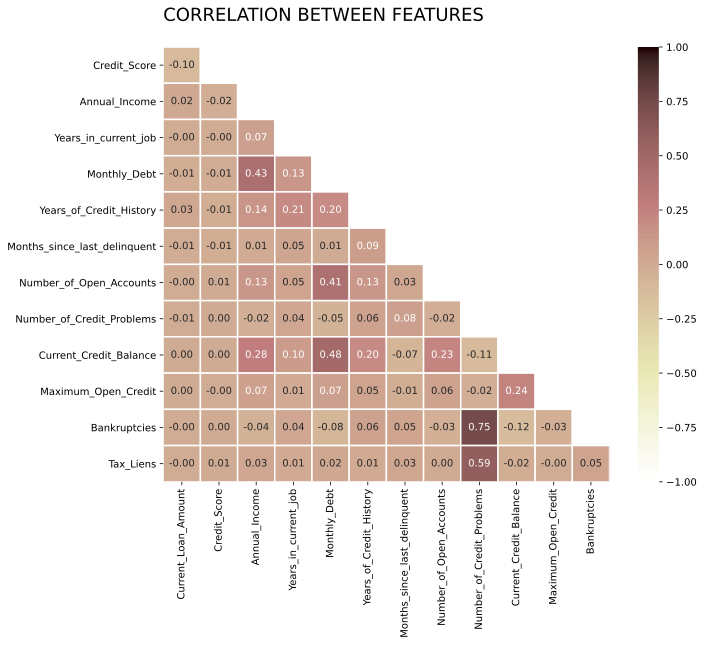

In [59]:
plt.figure(figsize=(10,8))

# corr
data_corr = df_train.corr()
# data_corr = bank_lone_train.corr()

# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

## Visualize data
___

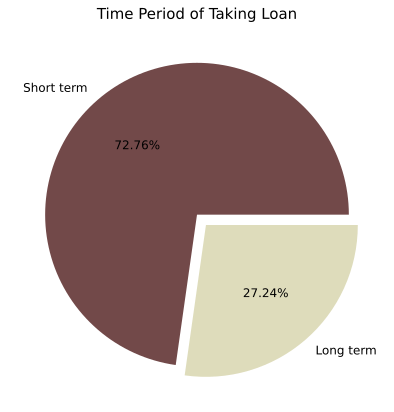

In [60]:
c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});

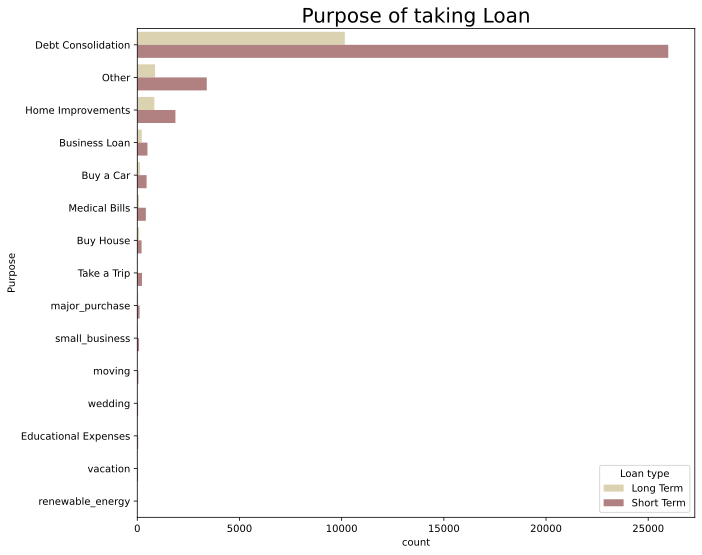

In [61]:
plt.figure(figsize=(10,9))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

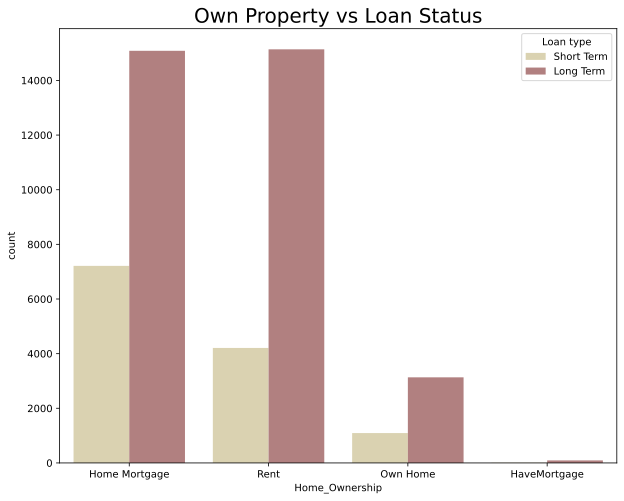

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(x='Home_Ownership',data=df_train ,order = df_train['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

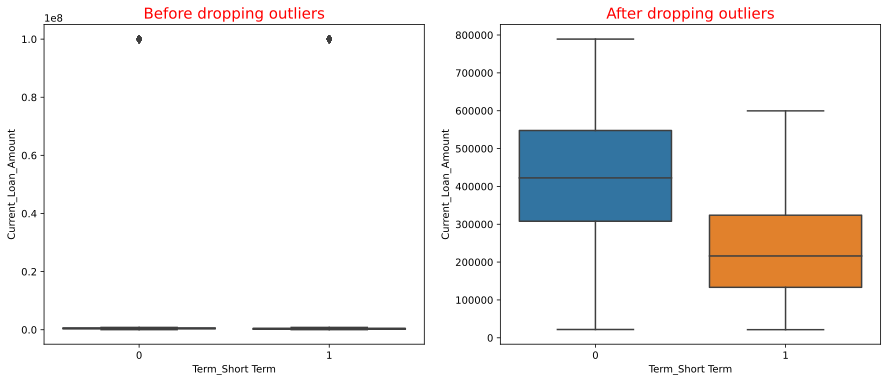

In [63]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train[bank_lone_train['Current_Loan_Amount'] != 99999999]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [64]:
bank_lone_val = bank_lone_val[bank_lone_val['Current_Loan_Amount'] != 99999999]
bank_lone_val = bank_lone_val[((bank_lone_val['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_val['Term_Short Term']==1))
                                  | (bank_lone_val['Term_Short Term']==0)]

In [68]:
bank_lone_test = bank_lone_test[bank_lone_test['Current_Loan_Amount'] != 99999999]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]

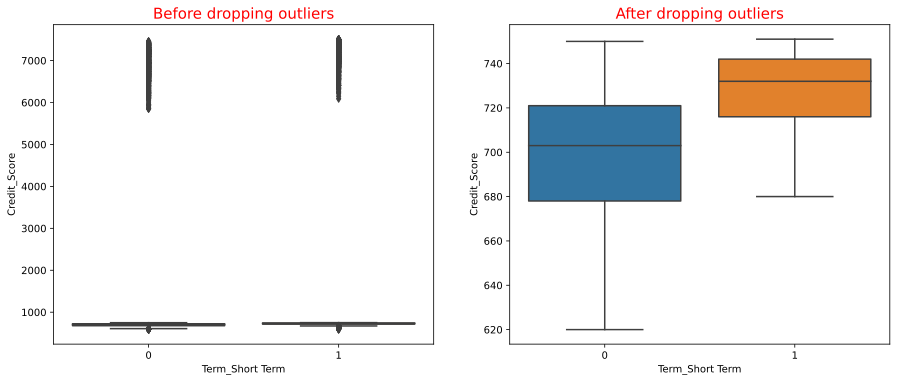

In [65]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Credit_Score',data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] <= 1500,:]
bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] >= 620 ,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Credit_Score'] >= 680 )
                                   & (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [66]:
bank_lone_val = bank_lone_val.loc[bank_lone_val['Credit_Score'] <= 1500,:]
bank_lone_val = bank_lone_val.loc[bank_lone_val['Credit_Score'] >= 620 ,:]
bank_lone_val = bank_lone_val[((bank_lone_val['Credit_Score'] >= 680 )
                                   & (bank_lone_val['Term_Short Term']==1))| 
                                  (bank_lone_val['Term_Short Term']==0)]

In [69]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] <= 1500,:]
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] >= 620 ,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Credit_Score'] >= 680 )
                                   & (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

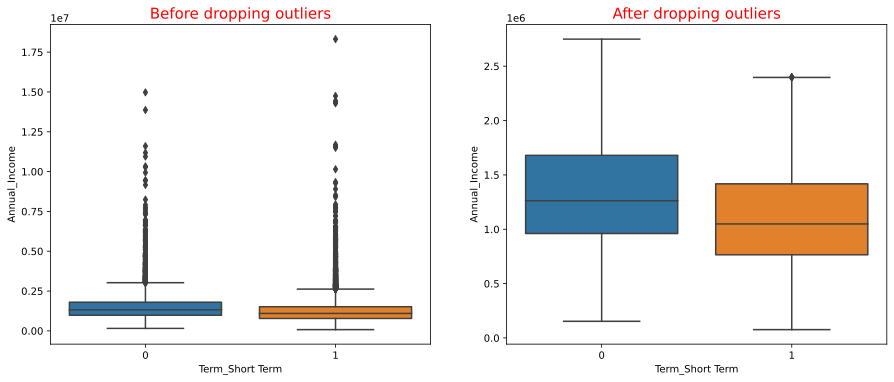

In [67]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Annual_Income'] <= 2750000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Annual_Income'] <= 2400000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [68]:
bank_lone_val = bank_lone_val.loc[bank_lone_val['Annual_Income'] <= 2750000,:]
bank_lone_val = bank_lone_val[((bank_lone_val['Annual_Income'] <= 2400000 )
                                   & (bank_lone_val['Term_Short Term']==1))
                                  | (bank_lone_val['Term_Short Term']==0)]

In [70]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Annual_Income'] <= 2750000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Annual_Income'] <= 2400000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]

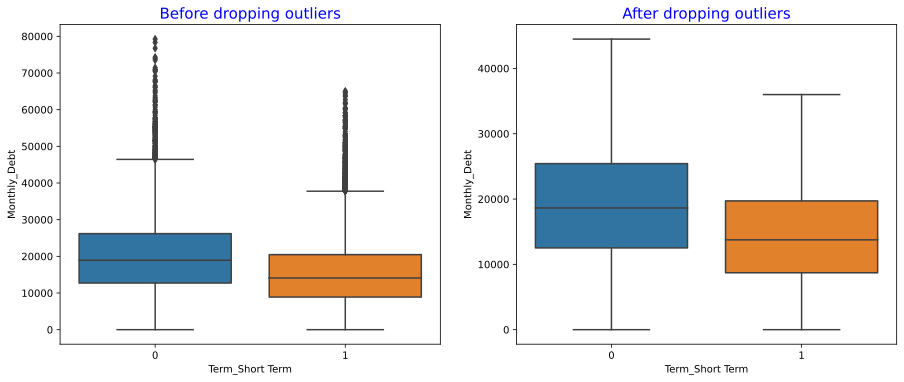

In [71]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'b')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Monthly_Debt'] <= 44500,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Monthly_Debt'] <= 36000 )& (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'b');

In [70]:
bank_lone_val = bank_lone_val.loc[bank_lone_val['Monthly_Debt'] <= 44500,:]
bank_lone_val = bank_lone_val[((bank_lone_val['Monthly_Debt'] <= 36000 )& 
                                   (bank_lone_val['Term_Short Term']==1))| 
                                  (bank_lone_val['Term_Short Term']==0)]

In [72]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Monthly_Debt'] <= 44500,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Monthly_Debt'] <= 36000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

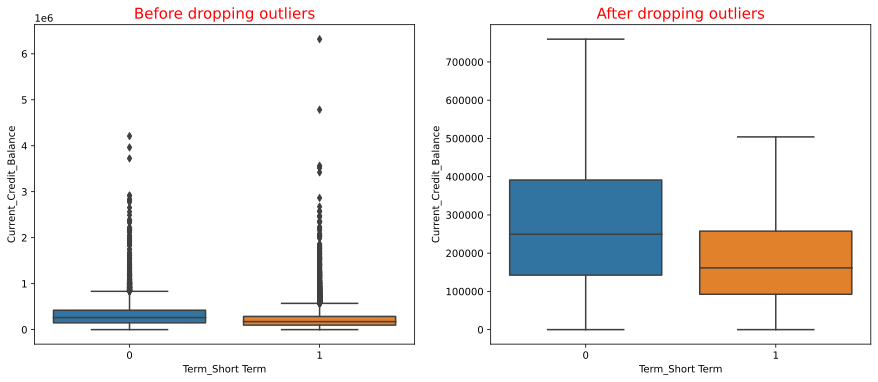

In [73]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Current_Credit_Balance'] <= 760000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [72]:
bank_lone_val = bank_lone_val.loc[bank_lone_val['Current_Credit_Balance'] <= 760000,:]
bank_lone_val = bank_lone_val[((bank_lone_val['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_val['Term_Short Term']==1))| 
                                  (bank_lone_val['Term_Short Term']==0)]


In [74]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Current_Credit_Balance'] <= 760000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]


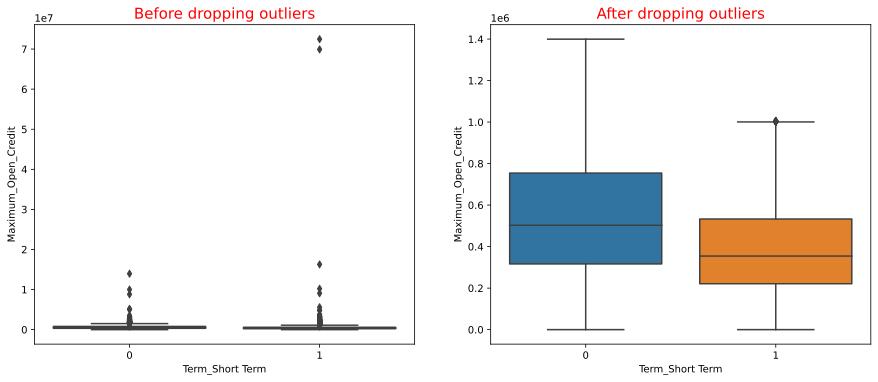

In [75]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Maximum_Open_Credit'] <= 1006000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [76]:
bank_lone_val = bank_lone_val.loc[bank_lone_val['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_val = bank_lone_val[((bank_lone_val['Maximum_Open_Credit'] <= 1006000 )& 
                                   (bank_lone_val['Term_Short Term']==1))| 
                                  (bank_lone_val['Term_Short Term']==0)]



In [77]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Maximum_Open_Credit'] <= 1006000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

## Balanceing Model Training - Class Weights
---

In [98]:
# class count
class_count_0, class_count_1 = bank_lone_train['Term_Short Term'].value_counts()

# Separate class
long_term_0 = bank_lone_train[bank_lone_train['Term_Short Term'] == 0]
short_term_1 = bank_lone_train[bank_lone_train['Term_Short Term'] == 1]# print the shape of the class
print('long term 0:', long_term_0.shape)
print('short term 1:', short_term_1.shape)

long term 0: (8193, 34)
short term 1: (19061, 34)


In [105]:
lr = LogisticRegression(solver='liblinear') 
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={0 : 2, 1 : 1}, solver='liblinear')

lr.fit(X_train, y_train)
print('Normal Logistic Regression Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, lr.predict(X_val)), roc_auc_score(y_val, lr.predict_proba(X_val)[:,1])))

lr_balanced.fit(X_train, y_train)
print('Balanced class weights Logistic Regression Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, lr_balanced.predict(X_val)), roc_auc_score(y_val, lr_balanced.predict_proba(X_val)[:,1])))

lr_4x.fit(X_val, y_val)
print('4:1 class weights Logistic Regression Val F1: %.3f, Val AUC: %.3f' % \
      (f1_score(y_val, lr_4x.predict(X_val)), roc_auc_score(y_val, lr_4x.predict_proba(X_val)[:,1])))

Normal Logistic Regression Val F1: 0.855, Val AUC: 0.855
Balanced class weights Logistic Regression Val F1: 0.828, Val AUC: 0.852
4:1 class weights Logistic Regression Val F1: 0.835, Val AUC: 0.853


## KNN Model
---

In [76]:
X_train = bank_lone_train.drop(['Term_Short Term','Loan_ID','Customer_ID'], axis = 1)
y_train = bank_lone_train['Term_Short Term']
X_val = bank_lone_val.drop(['Term_Short Term','Loan_ID','Customer_ID'], axis = 1)
y_val = bank_lone_val['Term_Short Term']

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(27254, 31)
(27254,)
(7574, 31)
(7574,)


In [78]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print('The accuracy for training : ',knn.score(X_train,y_train))
print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(knn.predict(X_val), y_val))

The accuracy for training :  0.8429955235928671
The accuracy for validation:  0.7821494586744124
f1_score for train:  0.8919362577973079
f1_score for validation:  0.8489010989010989


## Logistic Regression
---

In [79]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print('The accuracy for training : ',LR.score(X_train,y_train))
print('The accuracy for validation: ',LR.score(X_val,y_val))
print('f1_score for train: ',f1_score(LR.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(LR.predict(X_val), y_val))

The accuracy for training :  0.7979012255081823
The accuracy for validation:  0.7891470821230525
f1_score for train:  0.862780269058296
f1_score for validation:  0.8550158874262369


## Decision Tree Classifier
---

In [80]:
Decision_Tree = DecisionTreeClassifier(max_depth = 8)
Decision_Tree.fit(X_train, y_train)
print('The accuracy for training : ',Decision_Tree.score(X_train,y_train))
print('The accuracy for validation: ',Decision_Tree.score(X_val,y_val))
print('f1_score for train: ',f1_score(Decision_Tree.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Decision_Tree.predict(X_val), y_val))

The accuracy for training :  0.8713583327218023
The accuracy for validation:  0.8603115922894111
f1_score for train:  0.9111595378066086
f1_score for validation:  0.9021819526627219


## Random Forest Classifier
---

In [81]:
Random_Forest = ensemble.RandomForestClassifier(n_estimators = 100, random_state=1)
Random_Forest.fit(X_train, y_train)
print('The accuracy for training : ',Random_Forest.score(X_train,y_train))
print('The accuracy for validation: ',Random_Forest.score(X_val,y_val))
print('f1_score for train: ',f1_score(Random_Forest.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Random_Forest.predict(X_val), y_val))

The accuracy for training :  1.0
The accuracy for validation:  0.9050699762344864
f1_score for train:  1.0
f1_score for validation:  0.9329228472805299


## Voting Classifer (HARD)
---

In [82]:
sv = SVC()

In [83]:
models = [('lr', LR ), ('rf', Random_Forest ), ('svc', sv )]

In [84]:
VC = VotingClassifier(estimators= models, voting='hard', n_jobs=-1)
VC.fit(X_train, y_train)
print('The accuracy for training : ',VC.score(X_train,y_train))
print('The accuracy for validation: ',VC.score(X_val,y_val))
print('f1_score for train: ',f1_score(VC.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(VC.predict(X_val), y_val))

The accuracy for training :  0.8302267557055845
The accuracy for validation:  0.8093477686823343
f1_score for train:  0.886127039598356
f1_score for validation:  0.8707945597709377


In [85]:
# for model_name in models:
    
#     curr_model = eval(model_name)
    
#     curr_model.fit(X_train, y_train)